In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
np.random.seed(42)
date_rng = pd.date_range(start='2025-01-01', end='2025-06-30', freq='D')
trend = np.linspace(20, 50, len(date_rng))  # Upward trend
seasonality = 5 * np.sin(2 * np.pi * date_rng.dayofyear / 30)  # Monthly seasonality
noise = np.random.normal(0, 2, len(date_rng))  # Random noise
temperature = trend + seasonality + noise  # Combine components


In [3]:
df = pd.DataFrame({'Date': date_rng, 'Temperature': temperature})
df.set_index('Date', inplace=True)

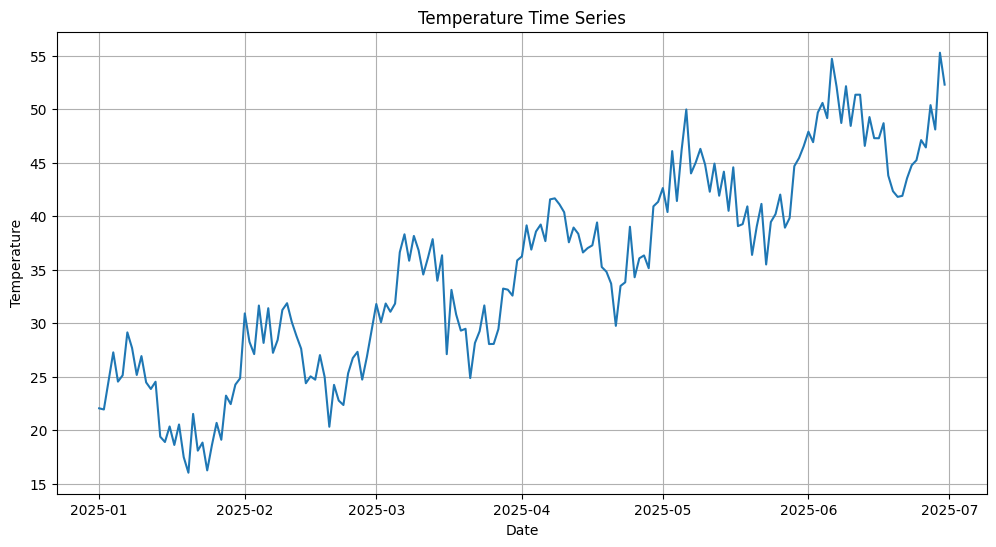

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperature'], linestyle='-')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid(True)

In [8]:
decomposition = seasonal_decompose(df['Temperature'], model='additive', period=30)

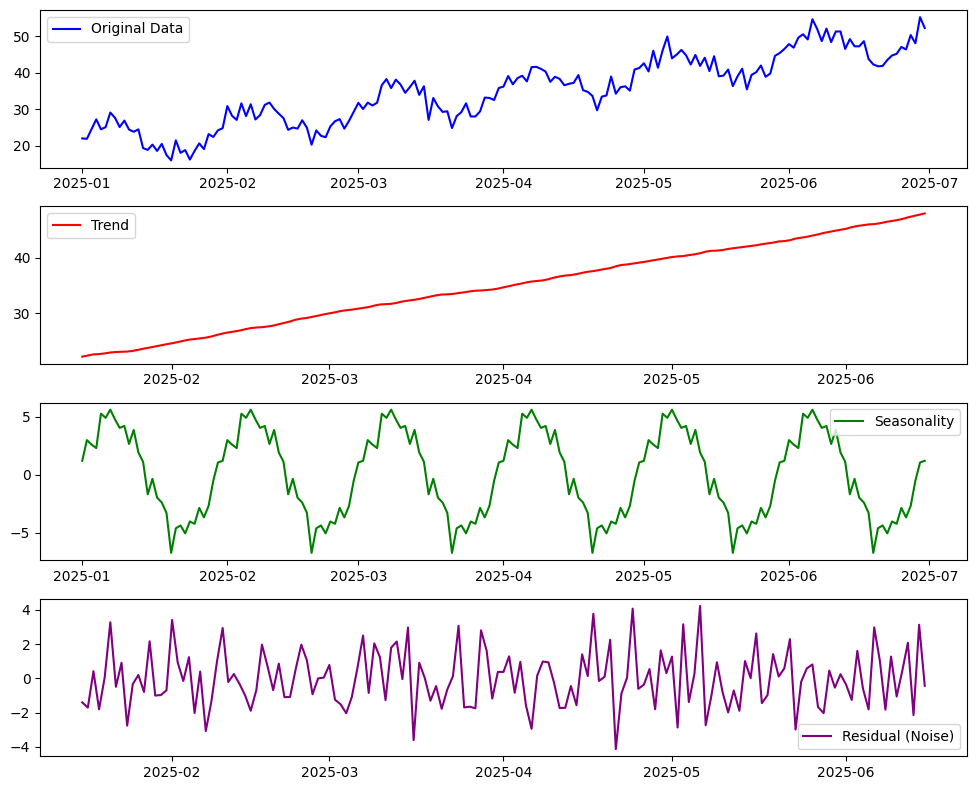

In [10]:
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Temperature'], label='Original Data', color='blue')
plt.legend()
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual (Noise)', color='purple')
plt.legend()

plt.tight_layout()
plt.show()